In [1]:
import numpy as np
import jPCA
from jPCA.util import load_churchland_data, plot_projections

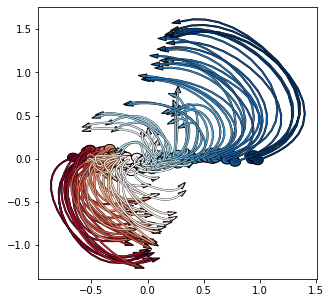

In [2]:
# Load publicly available data from Mark Churchland's group
path = "/Users/Bantin/Documents/Stanford/Linderman-Shenoy/jPCA_ForDistribution/exampleData.mat"
datas, times = load_churchland_data(path)

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=2)

# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datas, times=times, tstart=-50, tend=150)

# Plot the projected data
plot_projections(projected)